<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Step-by-Step-approach" data-toc-modified-id="Step-by-Step-approach-0.1">Step by Step approach</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1">Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1.1">Load data</a></span></li><li><span><a href="#Prep-Training-and-Test-data." data-toc-modified-id="Prep-Training-and-Test-data.-1.2">Prep Training and Test data.</a></span></li><li><span><a href="#Build-Logistic-Model" data-toc-modified-id="Build-Logistic-Model-1.3">Build Logistic Model</a></span></li></ul></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-2">Decision Trees</a></span><ul class="toc-item"><li><span><a href="#Example-I" data-toc-modified-id="Example-I-2.1">Example I</a></span><ul class="toc-item"><li><span><a href="#First-ten-observations-of-the-dataset" data-toc-modified-id="First-ten-observations-of-the-dataset-2.1.1">First ten observations of the dataset</a></span></li><li><span><a href="#Grow-the-decision-tree¶" data-toc-modified-id="Grow-the-decision-tree¶-2.1.2">Grow the decision tree¶</a></span><ul class="toc-item"><li><span><a href="#Plot-the-results" data-toc-modified-id="Plot-the-results-2.1.2.1">Plot the results</a></span></li></ul></li></ul></li><li><span><a href="#Example-II" data-toc-modified-id="Example-II-2.2">Example II</a></span></li></ul></li></ul></div>

# Classification

In the real world, we often come across scenarios which requires to make decisions that result into finite outcomes, like the below examples,  
  
Will it rain today?  
Will I reach office on time today?  
Would a child graduate from his/her university?  
Does sedentary lifestyle increase the chances to get the heart disease?  
Does smoking lead to lung cancer?  
Would I wear blue, black, red outfit today?  
What grade a student would get in an exam?  
All the above situations do reflect the input-output relationships. Here the output variable values are discrete & finite rather than continuous & infinite values like in Linear Regression. How could we model and analyze such data?  
    
We could try to frame a rule which helps in guessing the outcome from the input variables. This is called a classification problem, and is an important topic in statistics and machine learning. Classification, a task of assigning objects to one of the several predefined categories, is a pervasive problem that encompasses many diverse applications in a broad array of domains. Some examples of Classification Tasks are listed below:
    
In medical field, the classification task could be assigning a diagnosis to a given patient as described by observed characteristics of the patient such as age, gender, blood pressure, body mass index, presence or absence of certain symptoms, etc.  
In banking sector, one may want to categorize hundreds or thousands of applications for new cards containing information for several attributes such as annual salary, outstanding debts, age etc., into users who have good credit or bad credit for enabling a credit card company to do further analysis for decision making; OR one might want to learn to predict whether a particular credit card charge is legitimate or fraudulent.  
In social sciences, we may be interested to predict the preference of a voter for a party based on – age, income, sex, race, residence state, votes in previous elections etc.  
In finance sector, one would require to ascertain “whether a vendor is credit worthy”?  
In insurance domain, the company will need to assess “Is the submitted claim fraudulent or genuine”?  
In Marketing, the marketer would like to figure out “Which segment of consumers are likely to buy”?  
Mostly, in the business world, Classification problems where the response or dependent variable have discrete and finite outcomes, are more prevalent than the Regression problems where the response variable is continuous and have infinite values. Logistic Regression is one of the most common algorithm used for modeling classification problems.  

* Comes under the category of supervised machine learning
* First we should identify the boundary conditions & then the next task is to predict the target class
* To classify gender (target class) using hair length as feature parameter
* the idea is to predict the target class by analysis the training dataset.
* train your model using any abvailable classification algorithms

### Step by Step approach

<font color="red">**Step 1:**</font> load data and run numerical and graphical summaries

<font color="red">**Step 2:**</font> Split the data into training data and test data

<font color="red">**Step 3:**</font> Fit a model using training data

<font color="red">**Step 3:**</font> Use a fitted model to do predictions for the test data

<font color="red">**Step 4:**</font> Create a confusion matrix, and compute the misclassification rate

In [ ]:
**Install and load required packages**

In [116]:
ipak <- function(pkg){
    new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
    if (length(new.pkg)) 
        install.packages(new.pkg, repos = "http://cran.us.r-project.org", dependencies = TRUE)
    sapply(pkg, require, character.only = TRUE)
}

# usage
packages <- c("DMwR","caret","party", "partykit","e1071", "caret")
ipak(packages)

DMwR    caret    party partykit    e1071    caret 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE

## Logistic Regression

* response variable is quantitative or categorical
* Example Countries, skin color, eye color,...etc
* It comes under classfication technique and superviese machine learning
* predicting qualitative response 
* probability of each of the categories of a qualitative variable

**Sigmoid Function**  
![Imgur](https://i.imgur.com/fgSBPI5.png)

### Load data

In [ ]:
# install.packages('mlbench')
data(BreastCancer, package="mlbench")
bc <- BreastCancer[complete.cases(BreastCancer), ]  # keep complete rows

# remove id column
bc <- bc[,-1]

# convert to numeric
for(i in 1:9) {
  bc[, i] <- as.numeric(as.character(bc[, i]))
}

# Change Y values to 1's and 0's
bc$Class <- ifelse(bc$Class == "malignant", 1, 0)
bc$Class <- factor(bc$Class, levels = c(0, 1))

### Prep Training and Test data.

In [ ]:
library(caret)
'%ni%' <- Negate('%in%')  # define 'not in' func
options(scipen=999)  # prevents printing scientific notations.
set.seed(100)
trainDataIndex <- createDataPartition(bc$Class, p=0.7, list = F)
trainData <- bc[trainDataIndex, ]
testData <- bc[-trainDataIndex, ]

# Class distribution of train data
table(trainData$Class)


# Down Sample
set.seed(100)
down_train <- downSample(x = trainData[, colnames(trainData) %ni% "Class"],
                         y = trainData$Class)

table(down_train$Class)


# Up Sample (optional)
set.seed(100)
up_train <- upSample(x = trainData[, colnames(trainData) %ni% "Class"],
                     y = trainData$Class)

table(up_train$Class)

### Build Logistic Model

In [1]:
logitmod <- glm(Class ~ Cl.thickness + Cell.size + Cell.shape, family = "binomial", data=down_train)

summary(logitmod)

pred <- predict(logitmod, newdata = testData, type = "response")
pred

# Recode factors
y_pred_num <- ifelse(pred > 0.5, 1, 0)
y_pred <- factor(y_pred_num, levels=c(0, 1))
y_act <- testData$Class

# Accuracy
mean(y_pred == y_act)  # 94%

Loading required package: lattice
Loading required package: ggplot2



  0   1 
311 168 


  0   1 
168 168 


  0   1 
311 311 


Call:
glm(formula = Class ~ Cl.thickness + Cell.size + Cell.shape, 
    family = "binomial", data = down_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0716  -0.1534  -0.0316   0.0193   2.8420  

Coefficients:
             Estimate Std. Error z value        Pr(>|z|)    
(Intercept)   -8.8755     1.3285  -6.681 0.0000000000237 ***
Cl.thickness   0.7293     0.1768   4.125 0.0000370162955 ***
Cell.size      1.0803     0.3334   3.240         0.00119 ** 
Cell.shape     0.8571     0.2920   2.935         0.00334 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 465.795  on 335  degrees of freedom
Residual deviance:  70.378  on 332  degrees of freedom
AIC: 78.378

Number of Fisher Scoring iterations: 8


1           2           5           8          13          15 
0.035863571 0.925571615 0.017621937 0.009733832 0.641806266 0.999850252 
         16          21          28          31          32          33 
0.996643287 0.765800234 0.035863571 0.008576188 0.004154196 0.999993727 
         34          37          39          42          43          45 
0.004154196 0.999999981 0.925571615 0.995082725 0.999999653 0.999999981 
         47          50          56          61          62          66 
0.998966755 0.999981010 0.999956465 0.908663750 0.002007623 0.988490017 
         69          74          77          78          79          81 
0.999139136 0.998157826 0.025643875 0.243976163 0.008576188 0.028137479 
         82          85          88          90          97         106 
0.017621937 0.991106566 0.992872598 0.004154196 0.004154196 0.947795089 
        107         108         110         119         122         124 
0.999999981 0.994471135 0.987005498 0.002007623 0.050183740 0.908663750 
        125         128         132         134         136         142 
0.985723893 0.008576188 0.004154196 0.008576188 0.035863571 0.004154196 
        143         155         156         157         158         161 
0.999373803 0.002007623 0.988546448 0.013769518 0.004154196 0.999993727 
        168         169         172         173         176         177 
0.999999837 0.008576188 0.002007623 0.002007623 0.999918344 0.004154196 
        183         185         186         187         190         194 
0.071611817 0.999936443 0.004154196 0.983888423 0.031850749 0.002007623 
        195         196         199         202         207         217 
0.008576188 0.017621937 0.002007623 0.999999096 0.999999956 0.002007623 
        220         228         230         233         235         239 
0.299857826 0.999999440 0.999999981 0.998378453 0.150263386 0.999999919 
        244         246         249         256         259         260 
0.002007623 0.035863571 0.017621937 0.998333393 0.008576188 0.999759526 
        261         266         267         270         275         282 
0.999976905 0.327351486 0.999999422 0.002007623 0.008576188 0.004154196 
        287         297         307         308         319         321 
0.999999981 0.808504190 0.002007623 0.002007623 0.002007623 0.994946545 
        323         326         330         334         336         337 
0.008576188 0.056636877 0.999622436 0.985723893 0.002007623 0.994443731 
        342         347         350         353         355         356 
0.002007623 0.205192867 0.226818687 0.872031312 0.002007623 0.017621937 
        359         360         361         365         367         368 
0.999994139 0.997385415 0.999999653 0.004154196 0.999999653 0.999965345 
        372         378         380         383         388         403 
0.011045999 0.002007623 0.808504190 0.056636877 0.641806266 0.641806266 
        404         410         415         424         431         435 
0.008576188 0.019976007 0.999448880 0.171178791 0.017152904 0.999986630 
        439         440         445         446         448         450 
0.090576441 0.035863571 0.035863571 0.004154196 0.035863571 0.999956681 
        456         457         459         466         467         468 
0.908250272 0.999897423 0.080586611 0.999999693 0.999956465 0.999195607 
        470         475         477         479         481         483 
0.004717785 0.035863571 0.040553898 0.098744190 0.035863571 0.999999961 
        489         497         502         508         510         511 
0.961670081 0.002007623 0.017621937 0.002007623 0.004154196 0.002007623 
        514         518         520         521         532         540 
0.008576188 0.002007623 0.999788367 0.002007623 0.110713857 0.071611817 
        543         544         548         555         559         561 
0.243976163 0.017621937 0.004154196 0.008576188 0.004154196 0.035863571 
        568         572         574         576         579         

[1] 0.9411765

## Decision Trees

### Example I

In [127]:
# install.packages("party")
# install.packages("partykit")

In [128]:
# library(party)
# library(partykit)

#### First ten observations of the dataset

In [129]:
print(head(readingSkills))
input.dat <- readingSkills[c(1:105),]

  nativeSpeaker age shoeSize    score
1           yes   5 24.83189 32.29385
2           yes   6 25.95238 36.63105
3            no  11 30.42170 49.60593
4           yes   7 28.66450 40.28456
5           yes  11 31.88207 55.46085
6           yes  10 30.07843 52.83124


#### Grow the decision tree¶

In [130]:
output.tree <- ctree(
 nativeSpeaker ~ age + shoeSize + score,
 data = input.dat)

##### Plot the results

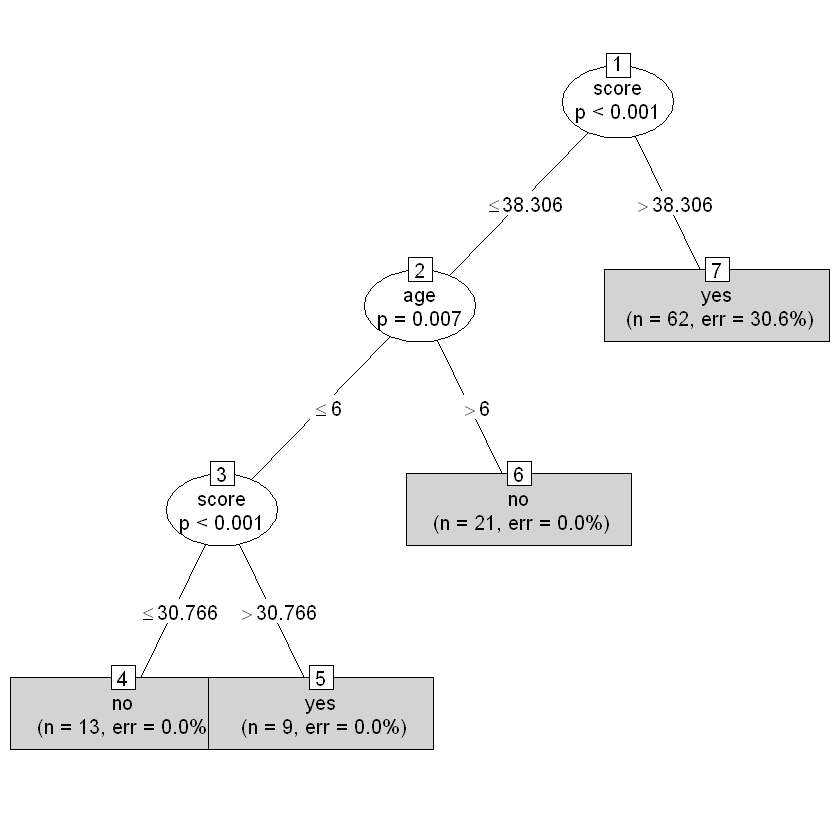

In [131]:
plot(as.simpleparty(output.tree))

### Example II 

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                


Model formula:
Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width

Fitted party:
[1] root
|   [2] Petal.Length <= 1.9: setosa (n = 42, err = 0.0%)
|   [3] Petal.Length > 1.9
|   |   [4] Petal.Width <= 1.7: versicolor (n = 42, err = 11.9%)
|   |   [5] Petal.Width > 1.7: virginica (n = 34, err = 2.9%)

Number of inner nodes:    2
Number of terminal nodes: 3


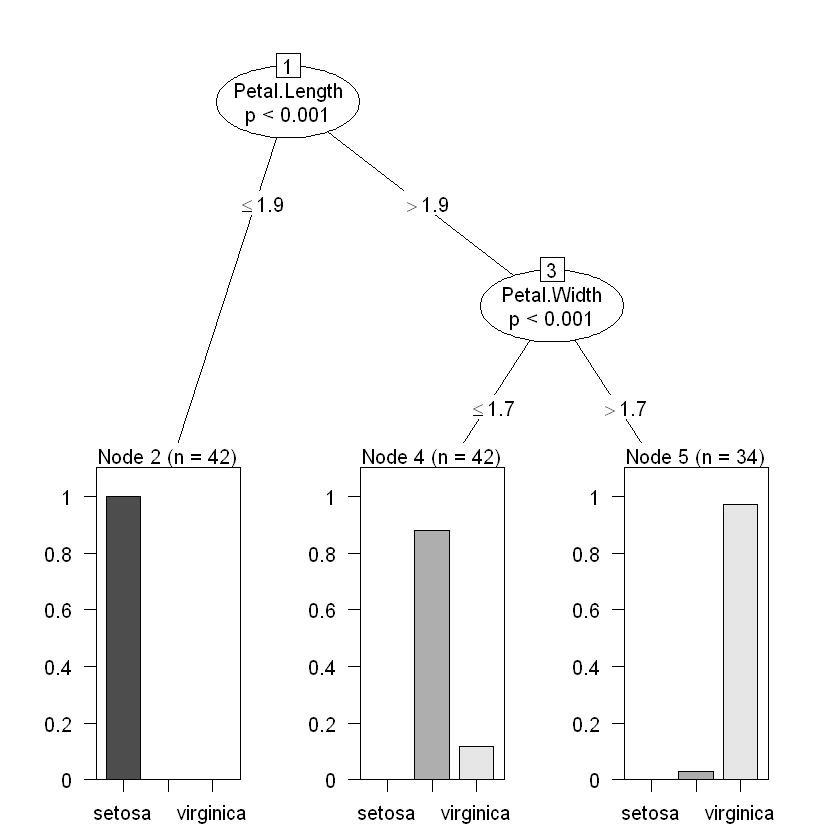

,setosa,versicolor,virginica
1,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
8,1,0,0
9,1,0,0
12,1,0,0
13,1,0,0
14,1,0,0


            Actual
Predicted    setosa versicolor virginica
  setosa         42          0         0
  versicolor      0         37         5
  virginica       0          1        33

[1] 0.05084746

            Actual
Predicted    setosa versicolor virginica
  setosa          8          0         0
  versicolor      0         12         0
  virginica       0          0        12

[1] 0

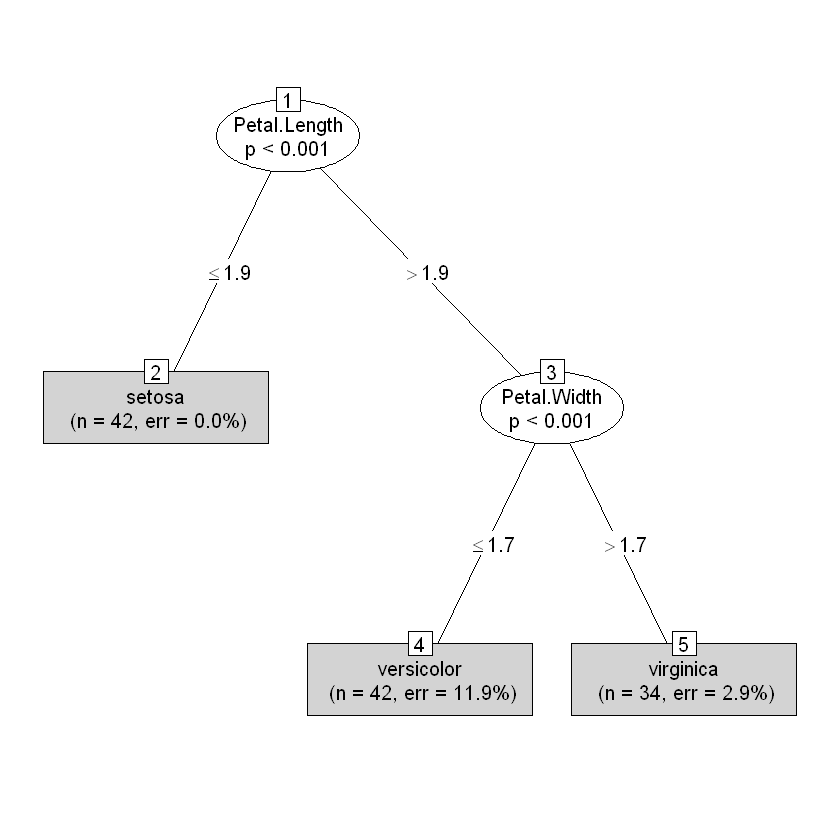

In [132]:
# library(party)
# library(partykit)

# Iris data
data("iris")
str(iris)
summary(iris)

# Data partition
set.seed(555)
ind <- sample(2, 
              nrow(iris),
              replace = TRUE,
              prob = c(0.8, 0.2))
train <- iris[ind==1, ]
test <- iris[ind==2, ]

# Decision tree model
tree <- partykit::ctree(Species~., 
              train,
              control = ctree_control(mincriterion = .9999, minsplit =20 ))

print(tree)

# Visualization of decision trees
plot(tree)
plot(tree, type = 'simple')

# Prediction
predict(tree, train, type = 'prob')

# Misclassification error - train data
p1 <- predict(tree, train)
tab1 <- table(Predicted = p1, Actual = train$Species)
tab1
1 - sum(diag(tab1))/sum(tab1)

# Misclassification error - test data
p2 <- predict(tree, test)
tab2 <- table(Predicted = p2, Actual = test$Species)
tab2
1 - sum(diag(tab2))/sum(tab2)

<span style="color:red; font-family:Comic Sans MS">Sources & References: </span>     
<a href="https://www.machinelearningplus.com/machine-learning/logistic-regression-tutorial-examples-r/" target="_blank">https://www.machinelearningplus.com/machine-learning/logistic-regression-tutorial-examples-r/</a>  